pacotes

In [1]:
import pandas as pd
import ssl

scraping

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
url_brent = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?stub=1&serid1650971490=1650971490&PerID=1&PerMetodo1650971490_0=LST'
url_ipca = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=36482'
url_inpc = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=36472'
url_igpdi = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=33593'
url_igpm = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=37796'


pagina_brent = pd.read_html(url_brent)
pagina_ipca = pd.read_html(url_ipca)
pagina_inpc = pd.read_html(url_inpc)
pagina_igpdi = pd.read_html(url_igpdi)
pagina_igpm = pd.read_html(url_igpm)

## Tratamento

brent

In [3]:
brent = pagina_brent[2]
brent.columns = ['Data','Preço - Brent (FOB)']
brent = brent.drop(0)
brent['Preço - Brent (FOB)'] = pd.to_numeric(brent['Preço - Brent (FOB)'])
brent['Preço - Brent (FOB)'] = brent['Preço - Brent (FOB)']/100
brent['Data'] = pd.to_datetime(brent['Data'])
brent.set_index('Data', inplace=True)

IPCA

In [4]:
ipca = pagina_ipca[2]
ipca.columns = ['Data','IPCA Indice']
ipca = ipca.drop(range(0,105))

ipca['IPCA Indice'] = ipca['IPCA Indice'].str.replace('.','')
ipca['IPCA Indice'] = ipca['IPCA Indice'].str.replace(',','.')
ipca['IPCA Indice'] = pd.to_numeric(ipca['IPCA Indice'])
ipca['Data'] = pd.to_datetime(ipca['Data'])
ipca.set_index('Data', inplace=True)

ipca['Variação Mensal'] = 0.0
for i in range(-1, -21, -1):
    ipca['Variação Mensal'][i] = ((ipca['IPCA Indice'][i] / ipca['IPCA Indice'][i-1]) - 1)*100

ipca['Acumulado 12 meses'] = 0.0
for i in range(-1, -201, -1):
    ipca['Acumulado 12 meses'][i] = ((ipca['IPCA Indice'][i] / ipca['IPCA Indice'][i-12]) - 1)*100

ipca['Acumulado no Ano'] = 0.0
for i in range(401, len(ipca)):
    ipca['Acumulado no Ano'][i] = (ipca['IPCA Indice'][i] / ipca['IPCA Indice'][400] - 1)*100

ipca = ipca.round(2)


C:\Users\mathe\AppData\Local\Temp\ipykernel_8680\530214562.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ipca['IPCA Indice'] = ipca['IPCA Indice'].str.replace('.','')


INPC

In [5]:
inpc = pagina_inpc[2]
inpc.columns = ['Data','INPC Indice']
inpc = inpc.drop(range(0,105))

inpc['INPC Indice'] = inpc['INPC Indice'].str.replace('.','')
inpc['INPC Indice'] = inpc['INPC Indice'].str.replace(',','.')
inpc['INPC Indice'] = pd.to_numeric(inpc['INPC Indice'])
inpc['Data'] = pd.to_datetime(inpc['Data'])
inpc.set_index('Data', inplace=True)

inpc['Variação Mensal'] = 0.0
for i in range(-1, -21, -1):
    inpc['Variação Mensal'][i] = ((inpc['INPC Indice'][i] / inpc['INPC Indice'][i-1]) - 1)*100

inpc['Acumulado 12 meses'] = 0.0
for i in range(-1, -201, -1):
    inpc['Acumulado 12 meses'][i] = ((inpc['INPC Indice'][i] / inpc['INPC Indice'][i-12]) - 1)*100

inpc['Acumulado no Ano'] = 0.0
for i in range(410, len(inpc)):
    inpc['Acumulado no Ano'][i] = (inpc['INPC Indice'][i] / inpc['INPC Indice'][409] - 1)*100

inpc = inpc.round(2)


C:\Users\mathe\AppData\Local\Temp\ipykernel_8680\124349729.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inpc['INPC Indice'] = inpc['INPC Indice'].str.replace('.','')


IGP-DI

In [6]:
igpdi = pagina_igpdi[2]
igpdi.columns = ['Data','IGP-DI Indice']
igpdi = igpdi.drop(range(0,105))

igpdi['IGP-DI Indice'] = igpdi['IGP-DI Indice'].str.replace('.','')
igpdi['IGP-DI Indice'] = igpdi['IGP-DI Indice'].str.replace(',','.')
igpdi['IGP-DI Indice'] = pd.to_numeric(igpdi['IGP-DI Indice'])
igpdi['Data'] = pd.to_datetime(igpdi['Data'])
igpdi.set_index('Data', inplace=True)

igpdi['Variação Mensal'] = 0.0
for i in range(-1, -21, -1):
    igpdi['Variação Mensal'][i] = ((igpdi['IGP-DI Indice'][i] / igpdi['IGP-DI Indice'][i-1]) - 1)*100

igpdi['Acumulado 12 meses'] = 0.0
for i in range(-1, -400, -1):
    igpdi['Acumulado 12 meses'][i] = ((igpdi['IGP-DI Indice'][i] / igpdi['IGP-DI Indice'][i-12]) - 1)*100

igpdi['Acumulado no Ano'] = 0.0
for i in range(832, len(igpdi)):
    igpdi['Acumulado no Ano'][i] = (igpdi['IGP-DI Indice'][i] / igpdi['IGP-DI Indice'][831] - 1)*100

igpdi = igpdi.round(2)

C:\Users\mathe\AppData\Local\Temp\ipykernel_8680\2623733390.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  igpdi['IGP-DI Indice'] = igpdi['IGP-DI Indice'].str.replace('.','')


In [7]:
igpdi.tail() #investigar porque acumulado 12 meses esta com erro

,IGP-DI Indice,Variação Mensal,Acumulado 12 meses,Acumulado no Ano
Data,,,,
2021-09-01,1064.31,-0.55,-99.99,0.00
2021-10-01,1081.30,1.60,-99.99,0.00
2021-11-01,1075.02,-0.58,-99.99,0.00
2021-12-01,1088.49,1.25,-99.99,0.00
2022-01-01,1110.40,2.01,-99.99,2.01


IGP-M

In [8]:
igpm = pagina_igpm[2]
igpm.columns = ['Data','IGP-M Indice']
igpm = igpm.drop(range(0,105))

igpm['IGP-M Indice'] = igpm['IGP-M Indice'].str.replace('.','')
igpm['IGP-M Indice'] = igpm['IGP-M Indice'].str.replace(',','.')
igpm['IGP-M Indice'] = pd.to_numeric(igpm['IGP-M Indice'])
igpm['Data'] = pd.to_datetime(igpm['Data'])
igpm.set_index('Data', inplace=True)

igpm['Variação Mensal'] = 0.0
for i in range(0, -21, -1):
    igpm['Variação Mensal'][i] = ((igpm['IGP-M Indice'][i] / igpm['IGP-M Indice'][i-1]) - 1)*100

# igpm['Acumulado 12 meses'] = 0.0
# for i in range(-1, -20, -1):
#     igpm['Acumulado 12 meses'][i] = ((igpm['IGP-M Indice'][i] / igpm['IGP-M Indice'][i-12]) - 1)*100

# igpm['Acumulado no Ano'] = 0.0
# for i in range(286, len(inpc)):
#     igpm['Acumulado no Ano'][i] = (igpm['IGP-M Indice'][i] / igpm['IGP-M Indice'][286] - 1)*100

# igpm = igpm.round(2)

C:\Users\mathe\AppData\Local\Temp\ipykernel_8680\2964015650.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  igpm['IGP-M Indice'] = igpm['IGP-M Indice'].str.replace('.','')


<AxesSubplot:xlabel='Data'>

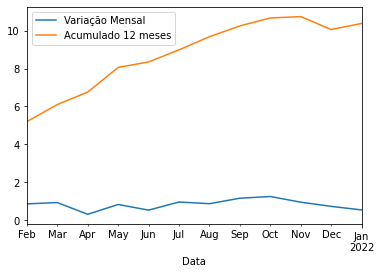

In [15]:
ipca.iloc[-12:,[1,2]].plot()